In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import seaborn as sns

## Bad Data

In [9]:
# Set a random seed for reproducibility
np.random.seed(15)
train_data_size = 1000
test_data_size = 100
# Generate training data from a normal distribution
mean = 0
std_dev = 10
x_train = np.random.normal(mean, std_dev, train_data_size).reshape(-1, 1)
y_train = 50*x_train**2 + np.random.randn(train_data_size, 1)*300
# Filter out only positive values in X_train
y_train = y_train[x_train > 0].reshape(-1,1)
x_train = x_train[x_train > 0].reshape(-1,1)



# Generate test data from a uniform distribution
low = -10
high = 10
x_test = np.random.uniform(low, high, test_data_size).reshape(-1,1)
y_test = 5 * x_test**3 + 1 + np.random.randn(test_data_size, 1)*300

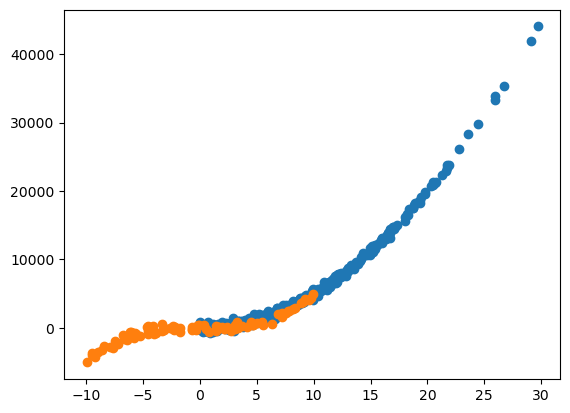

In [10]:
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

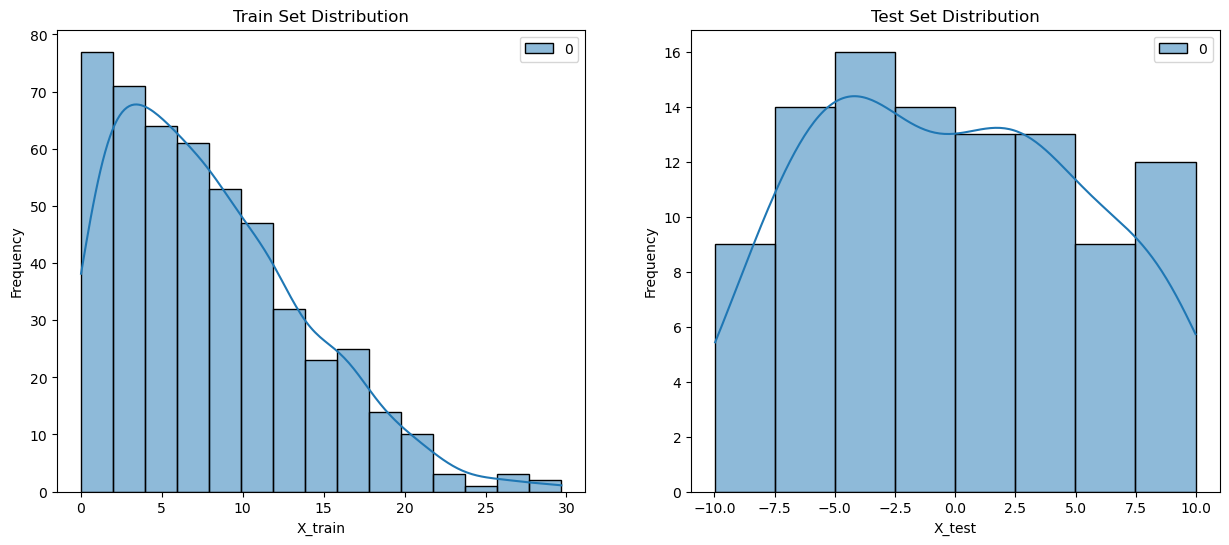

In [11]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
sns.histplot(x_train, kde=True)
plt.xlabel("X_train")
plt.ylabel("Frequency")
plt.title("Train Set Distribution")

plt.subplot(1, 2, 2)
sns.histplot(x_test, kde=True)
plt.xlabel("X_test")
plt.ylabel("Frequency")
plt.title("Test Set Distribution")
plt.show()

## fit the model

In [13]:
poly_feat = PolynomialFeatures()
x_train_new = poly_feat.fit_transform(x_train, 3)
model = LinearRegression()
model.fit(x_train_new, y_train)

LinearRegression()

## test the model and plot results

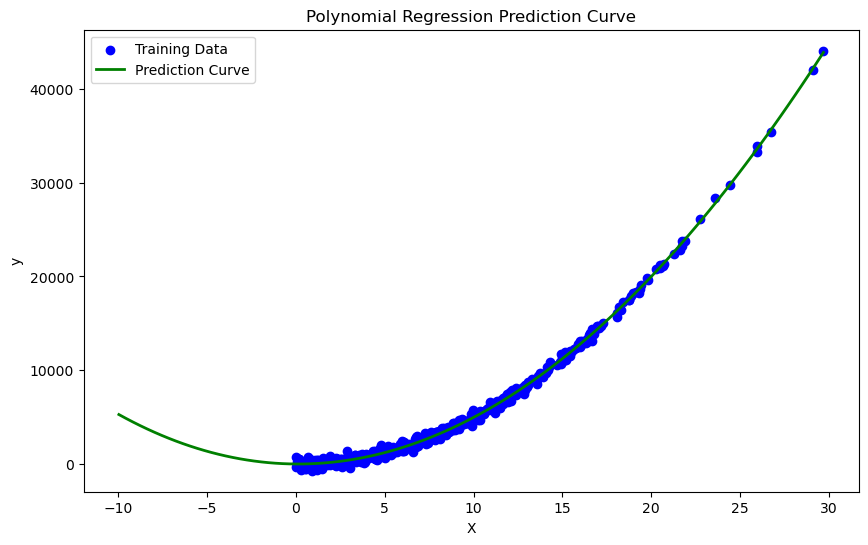

In [18]:
# train a polynomial regression model
poly_degree = 3
poly_feat = PolynomialFeatures(degree = poly_degree)
x_train_poly = poly_feat.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_poly, y_train)


# Generate a range of X values for the prediction curve
x_train_range = np.linspace(min(x_train.min(), x_test.min()), max(x_train.max(), x_test.max()), 100).reshape(-1,1)
x_train_range_poly = poly_feat.fit_transform(x_train_range)
y_train_range_pred = model.predict(x_train_range_poly)

# Plot the training data and the prediction curve
plt.figure(figsize = (10, 6))
plt.scatter(x_train, y_train, label='Training Data', c='blue', marker='o')
plt.plot(x_train_range, y_train_range_pred, label='Prediction Curve', c='green', linewidth=2)

plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='best')
plt.title('Polynomial Regression Prediction Curve')
plt.show()

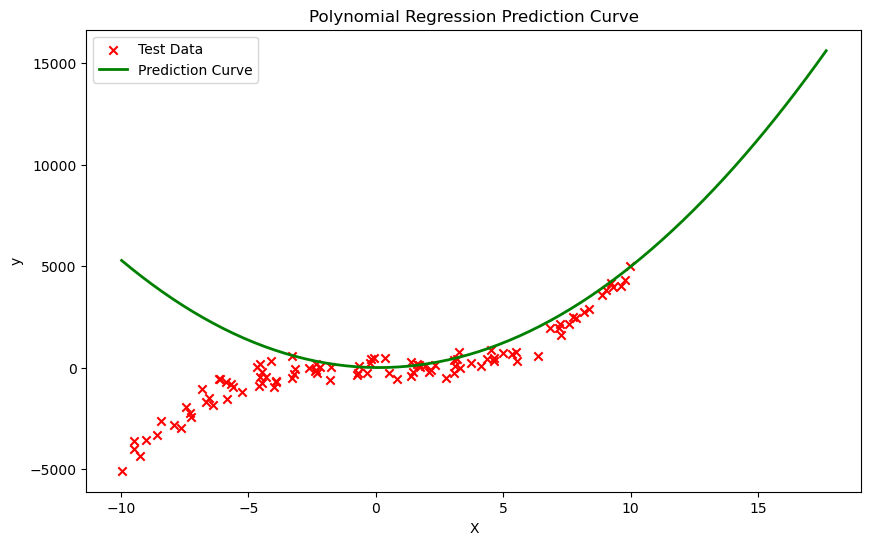

In [20]:
# Plot the test data, and the prediction curve
plt.figure(figsize=(22,6))
plt.subplot(1,2,2)
plt.scatter(x_test, y_test, label='Test Data', c='red', marker='x')
plt.plot(x_train_range[:70], y_train_range_pred[:70], label='Prediction Curve', c='green', linewidth=2)

plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='best')
plt.title('Polynomial Regression Prediction Curve')
plt.show()

## r2_score for prediction data

In [21]:
y_pred = model.predict(poly_feat.fit_transform(x_test))
r2_score = r2_score(y_pred, y_test)
r2_score

-2.554136135316121

## Residual plots on the test data

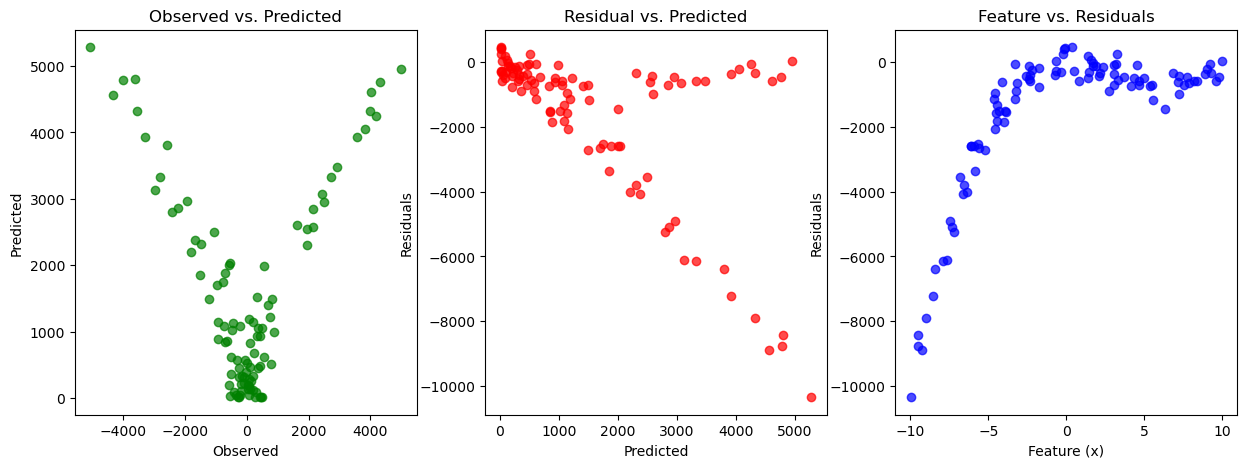

In [23]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(y_test, y_pred, c= 'g', alpha=0.7)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs. Predicted')

residuals = y_test - y_pred

plt.subplot(1,3,2)
plt.scatter(y_pred, residuals, c= 'r', alpha=0.7)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual vs. Predicted')

plt.subplot(1,3,3)
plt.scatter(x_test, residuals, c= 'b', alpha=0.7)
plt.xlabel('Feature (x)')
plt.ylabel('Residuals')
plt.title('Feature vs. Residuals')

plt.show()

## GOOD Data

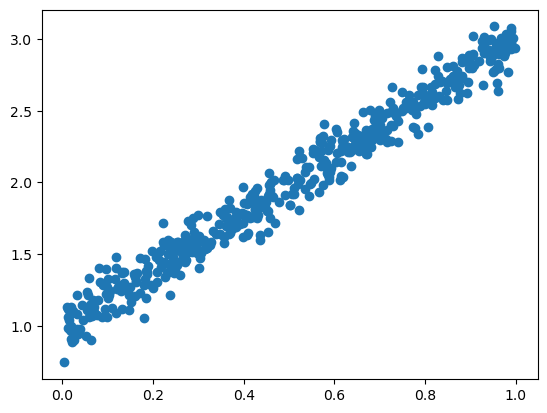

In [31]:
# generate the data

mu, sigma = 0, 1
data_size = 500
np.random.seed(0)
X = np.random.rand(data_size, 1)
y = 2 * X + 1 + 0.1 * np.random.randn(data_size, 1)
plt.scatter(X,y);


# Split into train, test and fit a model

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

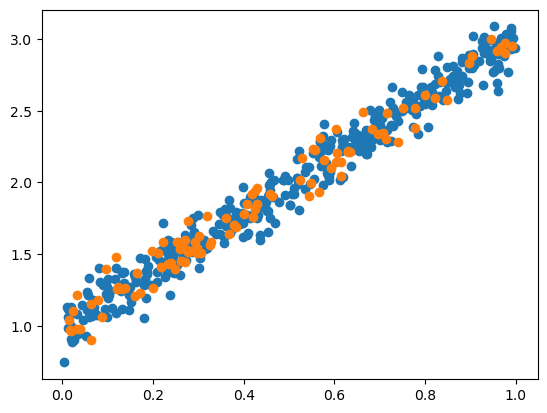

In [33]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

## Histograms for both train and test data

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

Text(0.5, 1.0, 'Test Set Distribution')

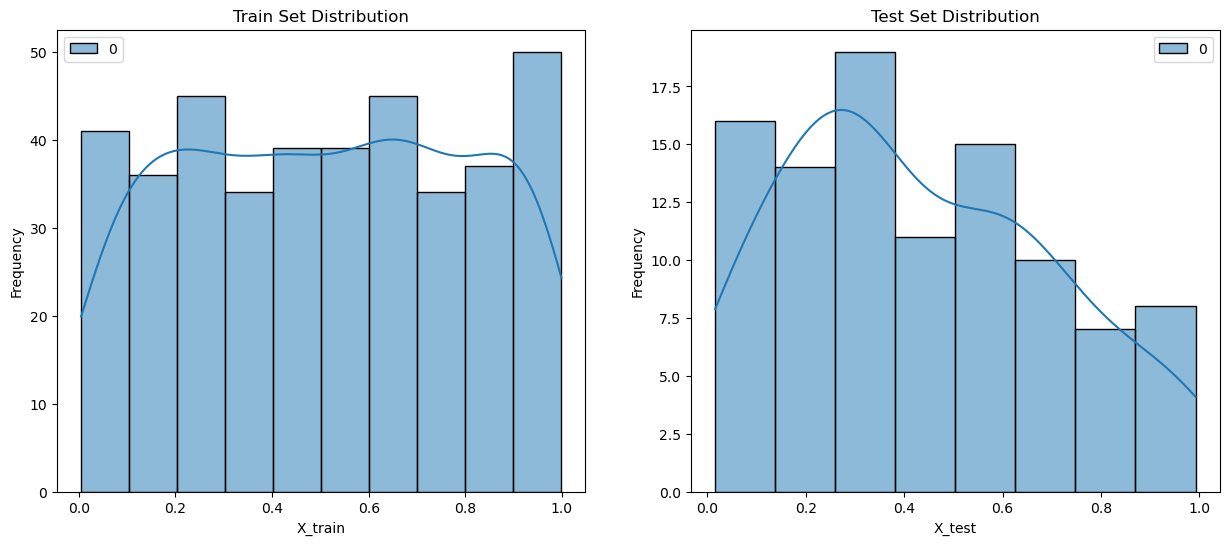

In [34]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
sns.histplot(X_train, kde=True)
plt.xlabel("X_train")
plt.ylabel("Frequency")
plt.title("Train Set Distribution")

plt.subplot(1, 2, 2)
sns.histplot(X_test, kde=True)
plt.xlabel("X_test")
plt.ylabel("Frequency")
plt.title("Test Set Distribution")

## Test the model and plot results

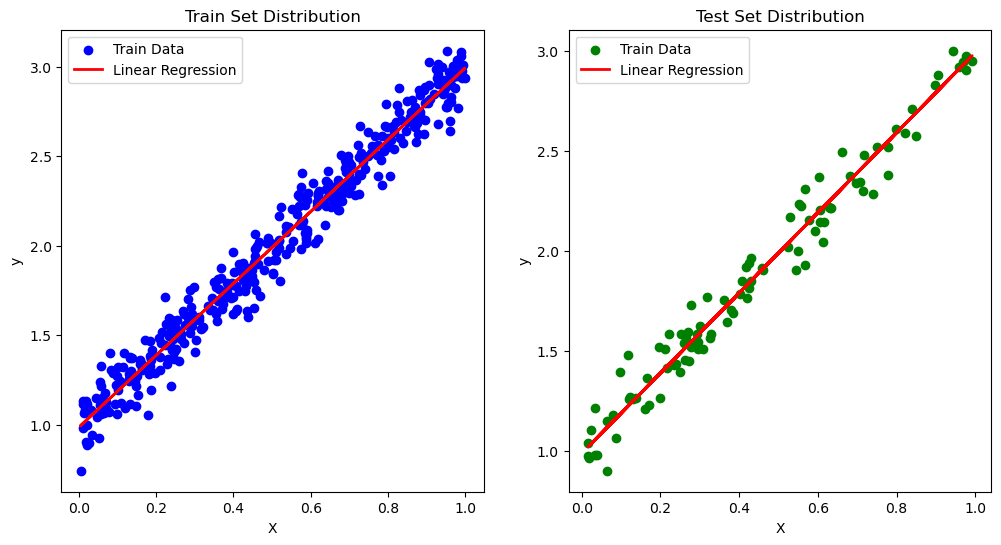

In [36]:
# Predict on the test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot the distribution of the train and test sets
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.scatter(X_train, y_train, label ="Train Data", color ="b")
plt.plot(X_train, y_train_pred,  color='r', linewidth=2, label="Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Train Set Distribution")
plt.legend()


plt.subplot(1,2,2)
plt.scatter(X_test, y_test, label ="Train Data", color ="g")
plt.plot(X_test, y_test_pred,  color='r', linewidth=2, label="Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Test Set Distribution")
plt.legend()

## r2 Score on test data

In [42]:
from sklearn.metrics import r2_score
r2 =r2_score(y_test_pred, y_test)
r2

0.9698567405860167

## Residual plots on the test data

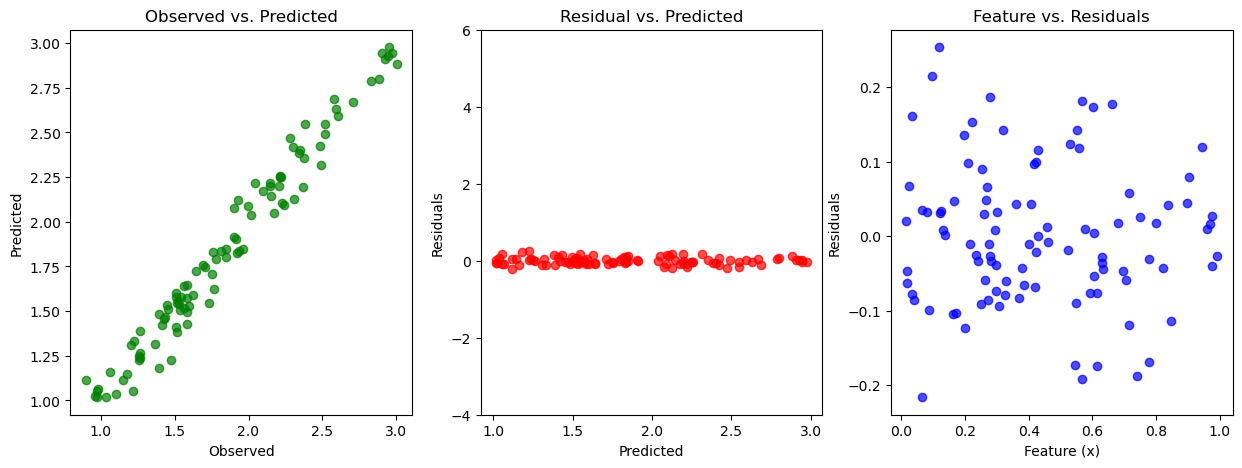

In [44]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(y_test, y_test_pred, c= 'g', alpha=0.7)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs. Predicted')

residuals = y_test - y_test_pred

plt.subplot(1,3,2)
plt.scatter(y_test_pred, residuals, c= 'r', alpha=0.7)
plt.ylim(-4,6)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual vs. Predicted')

plt.subplot(1,3,3)
plt.scatter(X_test, residuals, c= 'b', alpha=0.7)
plt.xlabel('Feature (x)')
plt.ylabel('Residuals')
plt.title('Feature vs. Residuals')

plt.show()

# Split data into train, test and validation and fit a model

In [57]:
X_train, X_temp, y_train, y_temp =  train_test_split(X, y, test_size = .4, random_state = 42)
X_val, X_test, y_val, y_test =  train_test_split(X_temp, y_temp, test_size = .5, random_state = 42)
model.fit(X_train, y_train)

LinearRegression()

## Test the model on a test data and plot the results

In [58]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


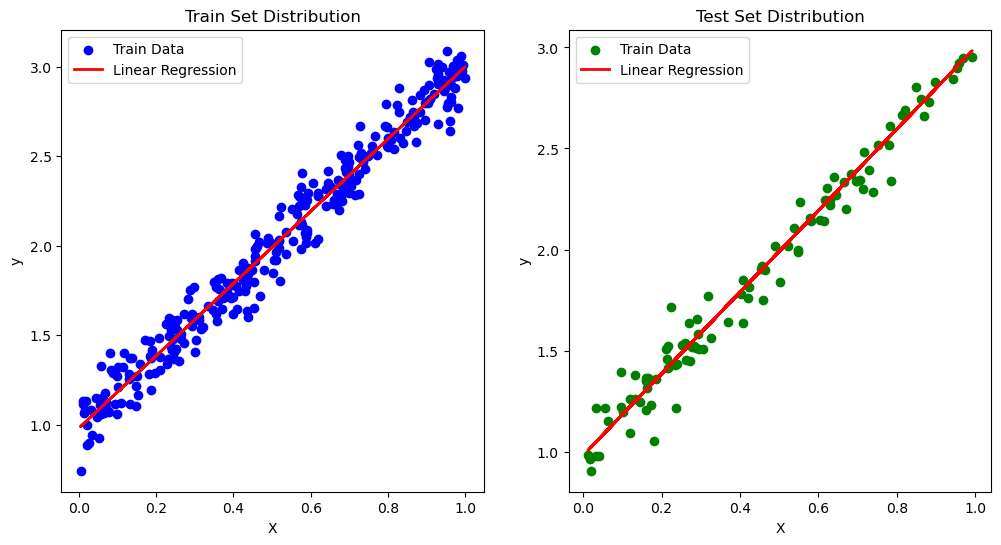

In [59]:
# Plot the distribution of the train and test sets
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.scatter(X_train, y_train, label ="Train Data", color ="b")
plt.plot(X_train, y_train_pred,  color='r', linewidth=2, label="Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Train Set Distribution")
plt.legend()


plt.subplot(1,2,2)
plt.scatter(X_test, y_test, label ="Train Data", color ="g")
plt.plot(X_test, y_test_pred,  color='r', linewidth=2, label="Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Test Set Distribution")
plt.legend()

In [60]:
r2 =r2_score(y_test_pred, y_test)
r2

0.973385267865014

## Residual plots on test data

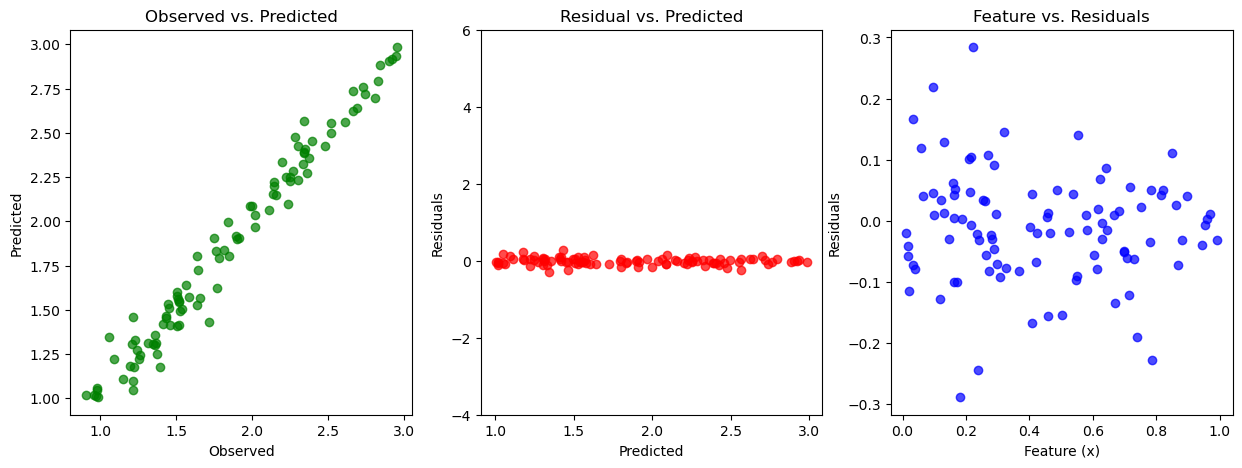

In [61]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(y_test, y_test_pred, c= 'g', alpha=0.7)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs. Predicted')

residuals = y_test - y_test_pred

plt.subplot(1,3,2)
plt.scatter(y_test_pred, residuals, c= 'r', alpha=0.7)
plt.ylim(-4,6)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual vs. Predicted')

plt.subplot(1,3,3)
plt.scatter(X_test, residuals, c= 'b', alpha=0.7)
plt.xlabel('Feature (x)')
plt.ylabel('Residuals')
plt.title('Feature vs. Residuals')


plt.show()

## Validate the model using validation data and plot the results

In [62]:
y_val_pred = model.predict(X_val)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

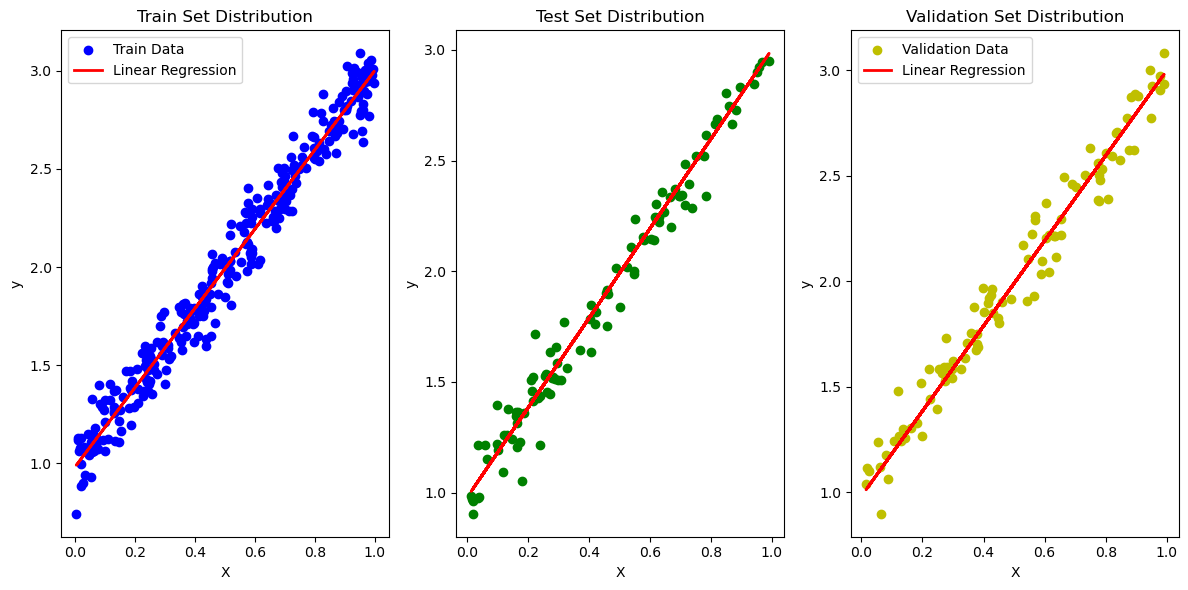

In [69]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_train, y_train, label="Train Data", color='b')
plt.plot(X_train, y_train_pred, color='r', linewidth=2, label="Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Train Set Distribution")
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_test, y_test, label="Test Data", color='g')
plt.plot(X_test, y_test_pred, color='r', linewidth=2, label="Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Test Set Distribution")

plt.subplot(1, 3, 3)
plt.scatter(X_val, y_val, label="Validation Data", color='y')
plt.plot(X_val, y_val_pred, color='r', linewidth=2, label="Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Validation Set Distribution")
plt.legend()

plt.tight_layout()
plt.show()

### Histograms for both train, test data and validation data

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

Text(0.5, 1.0, 'Validation Set Distribution')

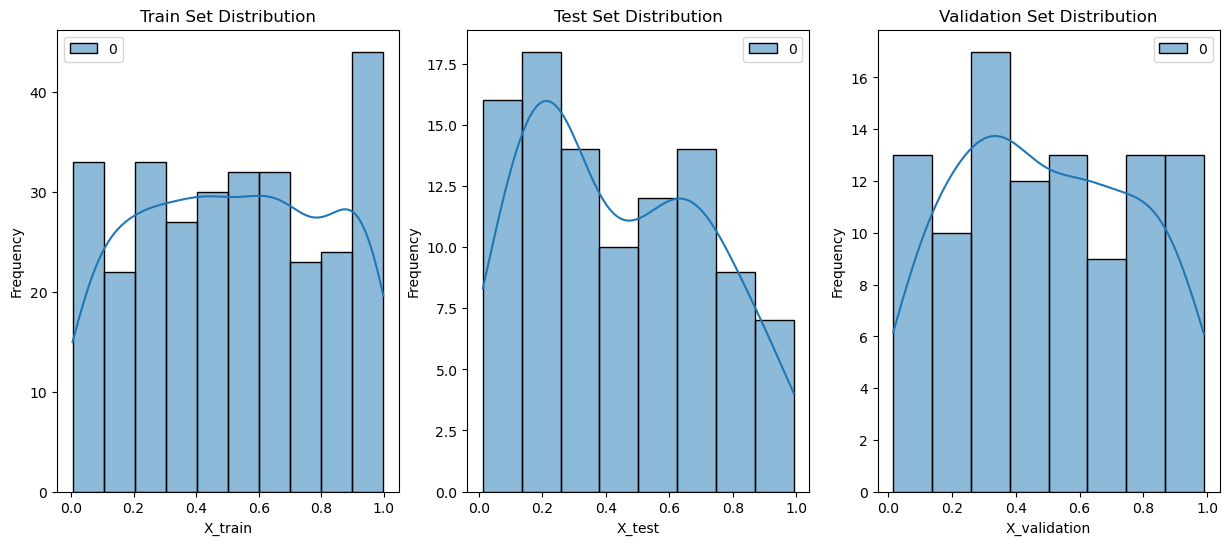

In [71]:
plt.figure(figsize=(15,6))
plt.subplot(1, 3, 1)
sns.histplot(X_train, kde=True)
plt.xlabel("X_train")
plt.ylabel("Frequency")
plt.title("Train Set Distribution")

plt.subplot(1, 3, 2)
sns.histplot(X_test, kde=True)
plt.xlabel("X_test")
plt.ylabel("Frequency")
plt.title("Test Set Distribution")

plt.subplot(1, 3, 3)
sns.histplot(X_val, kde=True)
plt.xlabel("X_validation")
plt.ylabel("Frequency")
plt.title("Validation Set Distribution")